# Trabajo Práctico 2: Análisis con Random Forest - Organización de Datos

**Alumnos y Padrón**
+ Craviotto Roitbarg, Mateo Exequiel - 106255 
+ Gómez, Joaquín - 103735

https://github.com/joaqogomez/Organizacion-de-datos-fiuba


## Configuraciones Iniciales
Primero, importamos las bibliotecas que vamos a utilizar:

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
from preprocessing import dividir_dataset
from preprocessing import preparar_dataset
from preprocessing import aplicar_one_hot_encoding

In [4]:
from funcionesAuxiliares import graficar_auc_roc
from funcionesAuxiliares import traer_df

## Carga del set de datos
Cargamos el dataset y aplicamos las funciones necesarias para adecuarlo al modelo:

In [5]:
df = traer_df()
df = preparar_dataset(df)
df = aplicar_one_hot_encoding(df)

También segmentamos el dataset en X e y (target), y luego lo dividimos en subsets de entrenamiento y validation development (test)

In [6]:
X, y = dividir_dataset(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Búsqueda de hiperparámetros
Definimos los mejores hiperparámetros, que son 'criterio', 'estimadores', 'profundidad' y 'min_samples_leaf' mediante la siguiente función de búsqueda, que utiliza Stratified K-folds cross validation para comparar cada combinación y así obtener la mejor. Nos quedamos con la combinación cuya media de los k-folds(5) tenga la mejor métrica. La métrica de comparación utilizada es AUC-ROC.

In [7]:
def definir_mejores_hiperparametros(X, y):    
    metrics = []
    for criterio in ['gini', 'entropy']:
        for estimadores in [1,10,20,50,100,200]:
            for profundidad in [2,3,4,5,6,7,8,9,10]:
                for min_samples in [0.05, 0.1, 0.15]:
                    kf = KFold(n_splits=5)
                    metricas_de_la_combinacion = []
                    for fold_index, (train_index, test_index) in enumerate(kf.split(X)):
                        random_forest = RandomForestClassifier(max_depth = profundidad, n_estimators = estimadores, criterion = criterio, min_samples_leaf = min_samples)
                        random_forest.fit(X.iloc[train_index], y.iloc[train_index])
                        y_pred = random_forest.predict_proba(X.iloc[test_index])[:,1]
                        metricas_de_la_combinacion.append(roc_auc_score(y.iloc[test_index], y_pred))
                        print(roc_auc_score(y.iloc[test_index], y_pred))
                    
                    print(f"Promedio de la combinacion {np.mean(metricas_de_la_combinacion)}")
                    metrics.append((profundidad, estimadores, criterio, min_samples, np.mean(metricas_de_la_combinacion)))
    df_metrics = pd.DataFrame(metrics, columns = ['profundidad_maxima', 'estimadores', 'criterio', 'min_samples_leaf', 'rocauc'])
    mejor_combinacion = df_metrics[df_metrics["rocauc"] ==  max(df_metrics.rocauc)]   
    return mejor_combinacion

## Entrenamiento y predicción con el dataset original
Buscamos la mejor combinación de hiperparámetros para este dataset, con la función anteriormente mencionada.

In [8]:
mejor_combinacion = definir_mejores_hiperparametros(X, y)

0.7651802722507265
0.6356367778656373
0.7881712665981329
0.7920827418759052
0.7542775982288273
Promedio de la combinacion 0.7470697313638459
0.7838371279829726
0.7374832653508601
0.7276989164621297
0.6728510251671878
0.7011394289495113
Promedio de la combinacion 0.7246019527825323
0.6605471278645265
0.665077494800189
0.7316824293184674
0.7025292800325513
0.5
Promedio de la combinacion 0.6519672664031468
0.7748384499434292
0.7507970651405189
0.7018867963797174
0.7810303226930078
0.7400291378257329
Promedio de la combinacion 0.7497163543964812
0.7360932154641049
0.6926944938111157
0.7043048188616421
0.7650908982086996
0.5
Promedio de la combinacion 0.6796366852691125
0.7792580953984756
0.7223387667118144
0.6464600470856838
0.7597630933647339
0.732764657980456
Promedio de la combinacion 0.7281169321082328
0.7453914846589244
0.7336459091775034
0.741008836598056
0.7868257706414148
0.6669055374592835
Promedio de la combinacion 0.7347555077070365
0.7580464751240206
0.7346204333654325
0.727527

0.8542352855937032
0.8621562547040453
0.8653688034405538
Promedio de la combinacion 0.8575773971695423
0.8421236365190676
0.8350419638453288
0.8228035298523471
0.8549561435280301
0.8455088304153096
Promedio de la combinacion 0.8400868208320166
0.8281976045067162
0.8478400232784515
0.8270506460525774
0.8419384288321946
0.847081445948697
Promedio de la combinacion 0.8384216297237274
0.8608638550674035
0.8658665351381962
0.8575163114731388
0.8722284343447576
0.8652598228827362
Promedio de la combinacion 0.8643469917812464
0.8370036790360349
0.8441630979130295
0.8474667347929228
0.8409408501471644
0.8342894314942997
Promedio de la combinacion 0.8407727586766903
0.8456658802881638
0.8419468823316031
0.8410899793396895
0.8531667439864
0.8252990126221499
Promedio de la combinacion 0.8414336997136014
0.8598698741845894
0.8657505995767081
0.8613008047804236
0.8605365861051558
0.8566878308224756
Promedio de la combinacion 0.8608291390938705
0.8333306940472641
0.8444876783398184
0.848915154844363

0.8481592975224699
0.8479705731144325
0.8488094013192786
0.855033655918453
0.8429046213355048
Promedio de la combinacion 0.8485755098420278
0.8588815581108994
0.8563929621829551
0.8670605996315928
0.8641075504646121
0.8661669126628664
Promedio de la combinacion 0.8625219166105851
0.8459131363318714
0.8468123266185961
0.8560064945412059
0.8537259634526833
0.8530470658591206
Promedio de la combinacion 0.8511009973606954
0.8489287459709044
0.8481889390819626
0.8534730927520853
0.8453394695917672
0.8500620928338762
Promedio de la combinacion 0.8491984680461192
0.859384696157663
0.8612062778747713
0.8653036342400517
0.8687933574899702
0.8652175157776874
Promedio de la combinacion 0.8639810963080288
0.8446990003671827
0.851731530558187
0.8529535606743616
0.8528412176342423
0.855634161237785
Promedio de la combinacion 0.8515718940943516
0.8382989247677299
0.8428724095546039
0.8510558507389805
0.8573774584977983
0.8484848966815961
Promedio de la combinacion 0.8476179080481419
0.860453478270049

0.7611295042752443
Promedio de la combinacion 0.7505790962821425
0.7783805005940325
0.665077494800189
0.6697539845209619
0.5
0.6382410423452768
Promedio de la combinacion 0.6502906044520921
0.7821865442243925
0.7658634035079478
0.7855455093320006
0.761111243830476
0.7752591230659609
Promedio de la combinacion 0.7739931647921555
0.5989631854354668
0.7237203375897407
0.5
0.5
0.6669055374592835
Promedio de la combinacion 0.5979178120968982
0.6605471278645265
0.6413590492370567
0.7752611416151568
0.5
0.5
Promedio de la combinacion 0.615433463743348
0.7952811367520971
0.7117296515800381
0.7585531903158909
0.7178496328982364
0.8244249414698697
Promedio de la combinacion 0.7615677106032264
0.6076056242284915
0.7428923736974375
0.6697539845209619
0.7616653257729533
0.7317346549267101
Promedio de la combinacion 0.7027303926293109
0.7651802722507265
0.6215244776049292
0.7579370752217149
0.6706154959020542
0.6382410423452768
Promedio de la combinacion 0.6906996726649404
0.8276783732522132
0.79446

0.8434610907990094
0.8515279693359004
0.8442933413067704
0.8500257659812704
Promedio de la combinacion 0.846514910087435
0.8286637925485101
0.8311640922056334
0.829018598181742
0.8418322105275056
0.8433124872760587
Promedio de la combinacion 0.8347982361478901
0.8672426876326402
0.8563340483889068
0.8481271414926232
0.8649253158164322
0.8647679789291531
Promedio de la combinacion 0.8602794344519511
0.8069086724622814
0.8403808714805043
0.8432970150839909
0.8486620346752032
0.8387468826343648
Promedio de la combinacion 0.8355990952672689
0.8303266071449722
0.8476776352016118
0.8435915119853346
0.8415185646991492
0.8445940426506514
Promedio de la combinacion 0.8415416723363439
0.858728028909066
0.8575399870037345
0.8603644373138501
0.8585270436684387
0.8612723305171011
Promedio de la combinacion 0.8592863654824381
0.8422538627560945
0.8520699423519065
0.8547195014573304
0.8544931884140619
0.8548146121742671
Promedio de la combinacion 0.8516702214307321
0.8378958864731053
0.84298332145923

0.8467543134161237
Promedio de la combinacion 0.8491625310485293
0.8552422401127193
0.8581454355184284
0.8622535620922133
0.8652746032161927
0.8631438314332247
Promedio de la combinacion 0.8608119344745557
0.8449756747946378
0.8476736554215043
0.8524924987190555
0.8545053258140536
0.8511034201954398
Promedio de la combinacion 0.8501501149889382
0.8486127397437344
0.8465651235558618
0.8545856510547322
0.8496637233792782
0.8537628511807818
Promedio de la combinacion 0.8506380177828777
0.861637938359667
0.8607592376568098
0.8652536842355836
0.8616875198757953
0.8651766719258958
Promedio de la combinacion 0.8629030104107503
0.844993570441644
0.8494261939992744
0.8534789462682338
0.8535913603289659
0.8539502748371335
Promedio de la combinacion 0.8510880691750504
0.8484618498279701
0.8462714027354791
0.850760378251612
0.8559045946416655
0.8519729107288273
Promedio de la combinacion 0.8506742272371108
0.8655720839236323
0.8565091587136306
0.8612703014573825
0.8651752563495941
0.86420214525651

En caso de que dos o más combinaciones den igual, decidimos quedarnos con la combinación que menor profundidad tenga.


In [9]:
mejor_combinacion = mejor_combinacion[mejor_combinacion['profundidad_maxima'] == mejor_combinacion.profundidad_maxima.min()]

Observamos que la mejor combinación de hiperparámetros es la siguiente:

In [10]:
parametros_random_forest = mejor_combinacion.loc[:].values[0]
mejor_profundidad = parametros_random_forest[0]
mejor_estimadores = parametros_random_forest[1]
mejor_criterio = parametros_random_forest[2]
mejor_min_samples_leaf = parametros_random_forest[3]
print(f'Mejor profundidad máxima: {mejor_profundidad}')
print(f'Mejor n° de estimadores: {mejor_estimadores}')
print(f'Mejor criterio: {mejor_criterio}')
print(f'Mejor mínima cantidad de instancias por hoja: {mejor_min_samples_leaf}')

Mejor profundidad máxima: 8
Mejor n° de estimadores: 50
Mejor criterio: gini
Mejor mínima cantidad de instancias por hoja: 0.05


Entrenamos un RandomForest con esa combinación de hiperparámetros.

In [11]:
random_forest = RandomForestClassifier(max_depth = mejor_profundidad, n_estimators = mejor_estimadores, criterion = mejor_criterio, min_samples_leaf = mejor_min_samples_leaf)
random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=0.05, n_estimators=50)

Luego, hacemos que este prediga sobre el subset de validation. A continuación se muestra el gráfico de la curva ROC y su respectivo score en la métrica AUC-ROC.

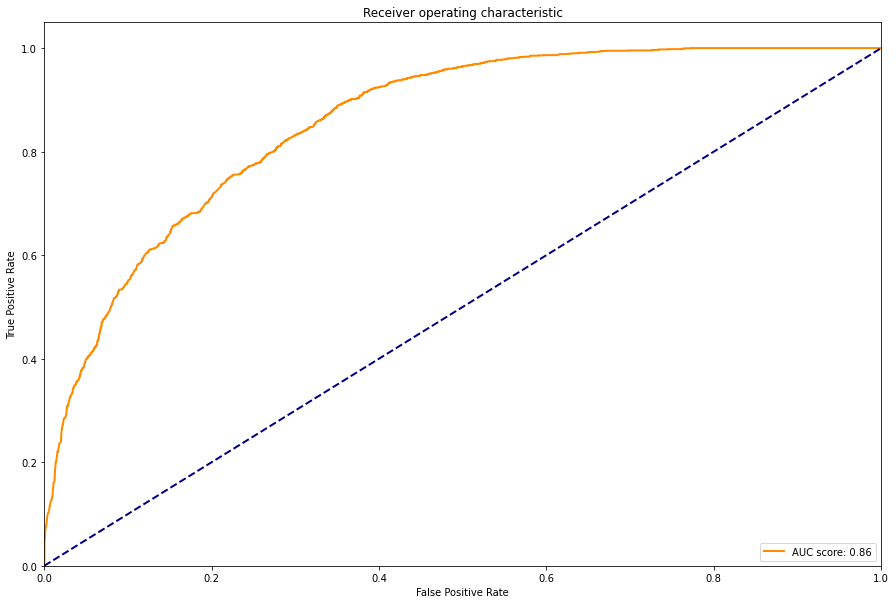

0.858101997372357

In [12]:
y_pred = random_forest.predict(X_test)
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]
graficar_auc_roc(y_test, y_pred_proba)

Podemos observar que 

Mostramos el classification report:

In [13]:
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))


                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.79      0.99      0.88      6159
   Tiene Alto Valor Adquisitivo       0.82      0.20      0.33      1982

                       accuracy                           0.79      8141
                      macro avg       0.81      0.59      0.60      8141
                   weighted avg       0.80      0.79      0.74      8141



Por último, mostramos la matriz de confusión correspondiente:

In [14]:
from funcionesAuxiliares import graficar_matriz_confusion

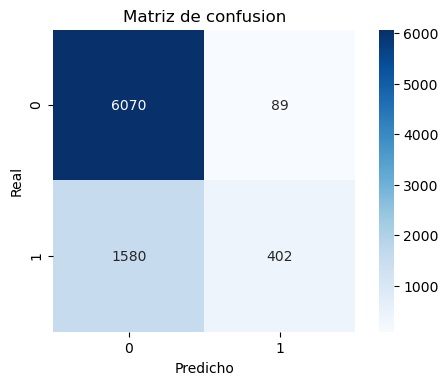

In [15]:
graficar_matriz_confusion(y_test, y_pred)

Podemos ver que

## Entrenamiento y predicción con el dataset ampliado
Como otra técnica de preprocesamiento, decidimos expandir el dataset utilizando clustering para obtener cuatro nuevas columnas. Las columnas corresponden a la utilización de K-means con 2, 4, 6 y 10 como cantidad de clusters usados. 

In [16]:
from preprocessing import expandir_dataset

Expandimos el dataset y realizamos el split del mismo en los subsets de entrenamiento y validación.

In [17]:
X_exp = expandir_dataset(X)
X_exp_train, X_exp_test, y_exp_train, y_exp_test = train_test_split(X_exp, y, test_size=0.25, random_state=0)

Buscamos la mejor combinación de hiperparámetros para este dataset.

In [18]:
mejor_combinacion = definir_mejores_hiperparametros(X_exp, y)
mejor_combinacion = mejor_combinacion[mejor_combinacion['profundidad_maxima'] == mejor_combinacion.profundidad_maxima.min()]

0.5937071437877901
0.6966458282770553
0.6198204999761306
0.8092663461879317
0.710781631718241
Promedio de la combinacion 0.6860442899894298
0.7615405680155607
0.7135132454911048
0.5
0.7643239943425588
0.7224025346091205
Promedio de la combinacion 0.6923560684916689
0.6605471278645265
0.751982191462654
0.5962010420039213
0.7610318048686258
0.7172530282980456
Promedio de la combinacion 0.6974030388995547
0.7882177635024588
0.7882622583751536
0.7778825412637116
0.8163821377544808
0.6230650066164496
Promedio de la combinacion 0.7587619415024508
0.744308540523727
0.6265405663553305
0.5971727907236598
0.6440904604916713
0.8137027305578175
Promedio de la combinacion 0.6851630177304412
0.6605471278645265
0.5
0.6746627431631907
0.5969875872287324
0.658617671009772
Promedio de la combinacion 0.6181630258532443
0.7898428556199798
0.8155336689397082
0.7440183894063325
0.7923167560852685
0.663834486970684
Promedio de la combinacion 0.7611092314043946
0.7311983697709306
0.7666142118600057
0.62567973

0.8656856932003256
Promedio de la combinacion 0.869007178676114
0.8324778827827395
0.8468385540219265
0.8486611772825818
0.8536113324527618
0.8451919406555375
Promedio de la combinacion 0.8453561774391094
0.8214286082130462
0.853317244582932
0.8493645748064405
0.8408196688043905
0.8400747531555375
Promedio de la combinacion 0.8410009699124693
0.8582392460036059
0.8704459571958338
0.8641303944866643
0.8666438817485871
0.872994261502443
Promedio de la combinacion 0.8664907481874268
0.8394147634195467
0.8431774172923403
0.8465198960363501
0.8429593832505421
0.8481263360138437
Promedio de la combinacion 0.8440395592025245
0.8439244664651024
0.8443750701354691
0.8400209972128156
0.8433925407264355
0.8487524175488601
Promedio de la combinacion 0.8440930984177367
0.8670961106965501
0.8620939645656037
0.8696060336483522
0.8715886841928153
0.8702489439128664
Promedio de la combinacion 0.8681267474032376
0.837001747851106
0.8478156226594327
0.8277674416245093
0.8414671894610892
0.847452476078990

0.8458918932976554
0.8426124842439854
0.8506157313636729
0.8528556669199465
0.845911988497557
Promedio de la combinacion 0.8475775528645635
0.8658410336113724
0.8691552035951116
0.8763088949901316
0.8721141886591217
0.8744999491042345
Promedio de la combinacion 0.8715838539919943
0.8513018503841514
0.8452454676176384
0.8566153902987985
0.8533528507862724
0.857957616551303
Promedio de la combinacion 0.8528946351276329
0.848419556878031
0.8452073661162827
0.8515946343809263
0.8481246496850956
0.8477073366245929
Promedio de la combinacion 0.8482107087369857
0.8616021470656546
0.8604486843238418
0.8743789256768648
0.8731780414012493
0.8669968317385993
Promedio de la combinacion 0.867320926041242
0.8489049280234503
0.8474494176472585
0.8538654734512475
0.858957182849096
0.8449928109731271
Promedio de la combinacion 0.8508339625888359
0.8426082995633463
0.8477407245026579
0.8491345316217999
0.8438625599356371
0.8534152967223128
Promedio de la combinacion 0.8473522824691507
0.866660499749461


0.7346204333654325
0.7580523894898427
0.7414142986535064
0.5
Promedio de la combinacion 0.6468174243017563
0.6774150626244648
0.7705585001578863
0.5962010420039213
0.5
0.7011394289495113
Promedio de la combinacion 0.6490628067471568
0.7771012836972457
0.7816013460790685
0.7865459402808673
0.7503858280378306
0.8015203201343648
Promedio de la combinacion 0.7794309436458755
0.5
0.5
0.5971727907236598
0.5
0.5
Promedio de la combinacion 0.5194345581447319
0.7460961740394156
0.5503635300780036
0.7732334185822081
0.5
0.6382410423452768
Promedio de la combinacion 0.6415868330089809
0.7952120003316488
0.8348670492474953
0.8255923400627523
0.8200746045519489
0.838633257837948
Promedio de la combinacion 0.8228758504063587
0.7509209177196775
0.5
0.6832443880714706
0.7771554095813793
0.8232309904315962
Promedio de la combinacion 0.7069103411608246
0.7167799499745856
0.6660408625553581
0.7275276035561802
0.7610318048686258
0.7727340569014658
Promedio de la combinacion 0.728822855571243
0.76782869926

0.8149678224991974
0.8538338644640449
0.816375908506866
0.8543047638436483
Promedio de la combinacion 0.8372669519244255
0.8421338074263589
0.8396615751578211
0.835974656616483
0.8470467971905965
0.8465078506718241
Promedio de la combinacion 0.8422649374126167
0.8687954890609961
0.8636726976645868
0.8755816281282003
0.8598902856103608
0.8626978572882736
Promedio de la combinacion 0.8661275915504835
0.8221680589222546
0.8418059589704243
0.8459598446190644
0.8190670719145445
0.8444673758143323
Promedio de la combinacion 0.8346936620481239
0.8449499900350858
0.8429929773191679
0.8362189433570851
0.8482063363136108
0.8541240202565147
Promedio de la combinacion 0.8452984534562928
0.8733754872379574
0.8588715170399831
0.8672749684007688
0.871546428059511
0.8733749618281759
Promedio de la combinacion 0.8688886725132793
0.8447891223305231
0.8418831406075884
0.8506434380067763
0.8531544139292656
0.8507653450732899
Promedio de la combinacion 0.8482470919894887
0.8470488661884538
0.84833462513081

0.8440203201343649
Promedio de la combinacion 0.8453668015431894
0.8683631611282858
0.8672478450469352
0.8733754378917873
0.8702671846318167
0.8694023564739415
Promedio de la combinacion 0.8697311970345533
0.8493163991589303
0.8490486368274498
0.8522398219386403
0.8564644562984244
0.8551657929560261
Promedio de la combinacion 0.8524470214358942
0.8469812103431175
0.8481964419460994
0.8525371155199215
0.8454855679250004
0.8461169711929968
Promedio de la combinacion 0.8478634613854272
0.8669368523127614
0.8670845435779397
0.8742714811360037
0.8688193019851905
0.8737351766083061
Promedio de la combinacion 0.8701694711240403
0.8452446244823781
0.8462714679777759
0.855250870645488
0.8544613357664645
0.8542413349959284
Promedio de la combinacion 0.8510939267736071
0.8441426903620481
0.8417824065012643
0.853975844750183
0.8525032970059025
0.8509889047231272
Promedio de la combinacion 0.848678628668505
0.8682129149408311
0.8684727039278473
0.868708169310223
0.8724854389731528
0.872456229641693

A continuación, vemos la mejor combinación de hiperparámetros obtenida.

In [19]:
parametros_random_forest = mejor_combinacion.loc[:].values[0]
mejor_profundidad = parametros_random_forest[0]
mejor_estimadores = parametros_random_forest[1]
mejor_criterio = parametros_random_forest[2]
mejor_min_samples_leaf = parametros_random_forest[3]
print(f'Mejor profundidad máxima: {mejor_profundidad}')
print(f'Mejor n° de estimadores: {mejor_estimadores}')
print(f'Mejor criterio: {mejor_criterio}')
print(f'Mejor mínima cantidad de instancias por hoja: {mejor_min_samples_leaf}')

Mejor profundidad máxima: 7
Mejor n° de estimadores: 200
Mejor criterio: gini
Mejor mínima cantidad de instancias por hoja: 0.05


Entrenamos un RandomForest con esa combinación de hiperparámetros.

In [20]:
random_forest_expandido = RandomForestClassifier(max_depth = mejor_profundidad, n_estimators = mejor_estimadores, criterion = mejor_criterio, min_samples_leaf = mejor_min_samples_leaf)
random_forest_expandido.fit(X_exp_train, y_exp_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=0.05, n_estimators=200)

Luego, hacemos que este prediga sobre el subset de validation. A continuación se muestra el gráfico de la curva ROC y su respectivo score en la métrica AUC-ROC.

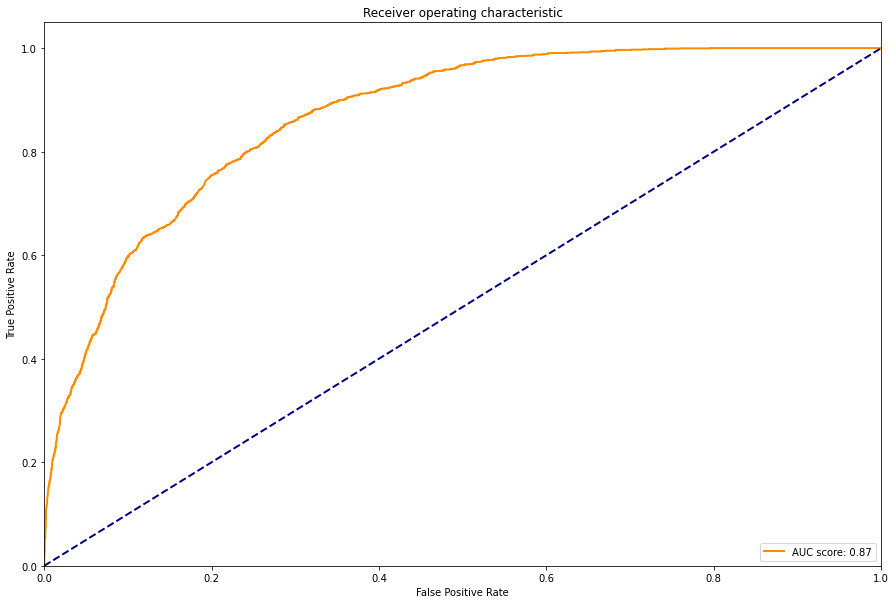

0.8683246228559062

In [21]:
y_pred = random_forest_expandido.predict(X_exp_test)
y_pred_proba = random_forest_expandido.predict_proba(X_exp_test)[:, 1]
graficar_auc_roc(y_exp_test, y_pred_proba)

Podemos observar que el score de AUC-ROC 

Mostramos el classification report:

In [22]:
print(classification_report(y_exp_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.80      0.99      0.88      6159
   Tiene Alto Valor Adquisitivo       0.84      0.23      0.36      1982

                       accuracy                           0.80      8141
                      macro avg       0.82      0.61      0.62      8141
                   weighted avg       0.81      0.80      0.76      8141



Por último, mostramos la matriz de confusión correspondiente:

In [23]:
from funcionesAuxiliares import graficar_matriz_confusion

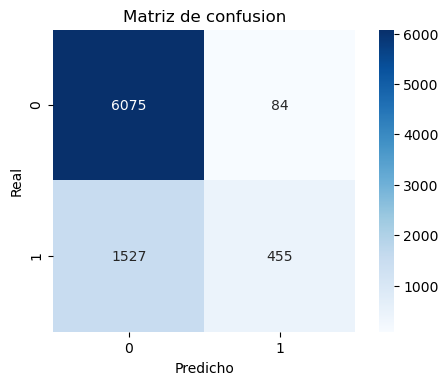

In [24]:
graficar_matriz_confusion(y_exp_test, y_pred)

Podemos ver que el random forest clasifica 

## Predicción con el dataset de test holdout
A continuación, realizamos la predicción con el random forest sin expandir el dataset sobre el dataset de holdout, y la escribimos al archivo 'RandomForest.csv'

In [25]:
from funcionesAuxiliares import traer_holdout
from preprocessing import preparar_holdout
from funcionesAuxiliares import escribir_predicciones

In [26]:
holdout = traer_holdout()
ids, holdout = preparar_holdout(holdout)
holdout = aplicar_one_hot_encoding(holdout)

In [27]:
predicciones = random_forest.predict(holdout)
escribir_predicciones(ids, predicciones, "RandomForest")